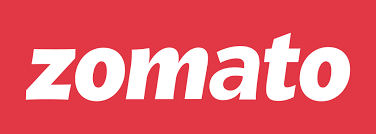

# Reading the data into python

This is one of the most important steps in machine learning! We must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "zomato.csv". This file contains over 12,000 restaurants details.


[You can download the data required from here](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)

# Data description

The meaning of each column in the data is as below

* **url** : contains the url of the restaurant in the zomato website
* **address** : contains the address of the restaurant in Bengaluru
* **name** : contains the name of the restaurant
* **online_order** : whether online ordering is available in the restaurant or not
* **book_table** : table book option available or not
* **rate** : contains the overall rating of the restaurant out of 5
* **votes** : contains total number of rating for the restaurant as of the above mentioned date
* **phone** :contains the phone number of the restaurant
* **location** : contains the neighborhood in which the restaurant is located
* **rest_type** : restaurant type
* **dish_liked** : dishes people liked in the restaurant
* **cuisines** : food styles, separated by comma
* **approx_cost(for two people)** : contains the approximate cost for meal for two people
* **reviews_list** : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
* **menu_item** : contains list of menus available in the restaurant
* **listed_in(type)** : type of meal
* **listed_in(city)** : contains the neighborhood in which the restaurant is listed







## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
data=pd.read_csv("Dataset/zomato.csv")

In [4]:
print('Shape before deleting duplicate values:', data.shape)

# Removing duplicate rows if any
data=data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

Shape before deleting duplicate values: (51717, 17)
Shape After deleting duplicate values: (51717, 17)


In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Defining the problem statement:
#### Create a Predictive model which can predict the future Rating of a restaurant
    
   * Target Variable: Rating
   * Predictors: location, menu, cost etc.


   * Rating=1 Worst
   * Rating=5 Best


## Determining the type of Machine Learning

Based on the problem statement we can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.


# Basic Data Exploration

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. We must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this data, you will ask, does this column affect the rating of the Restaurant? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

   * head() : This helps to see a few sample rows of the data
   * info() : This provides the summarized information of the data
   * describe() : This provides the descriptive statistical details of the data
   * nunique(): This helps us to identify if a column is categorical or continuous



In [6]:
#Looking at sample rows in the data
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 50%)
# Remove Qualitative variables which cannot be used in Machine Learning
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
#Percentage of null values 
data.isnull().sum() * 100 / len(data)

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [9]:
# Looking at the descriptive statistics of the data
data.describe(include='all')

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,7576,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

## Basic Data Exploration Results

The selected columns in this step are not final, further study will be done and then a final list will be created

* **url** : Categorical. Rejected. Too many unique levels, hence it will cause high dimensionality
* **address** : Qualitative. Rejected.
* **name** : Qualitative. Rejected.
* **online_order** :  Categorical. Selected.
* **book_table** : Categorical. Selected.
* **rate** : Continuous. Selected. This is the **Target Variable!** .We need to processed the values
* **votes** : Continuous. Selected.
* **phone** : Qualitative. Rejected.
* **location** : Qualitative. Rejected. Same as listed_in(city).
* **rest_type** : Qualitative. Rejected.
* **dish_liked** : Qualitative. Rejected. 54% Null values
* **cuisines** : Qualitative. Rejected. A new feature can be engineered from it.
* **approx_cost(for two people)** : Continuous. Selected.
* **reviews_list** : Qualitative. Rejected.
* **menu_item** : Qualitative. Rejected.
* **listed_in(type)** : Categorical. Selected.
* **listed_in(city)** : Qualitative. Rejected.



## Feature Engineering

Data type of **rate** is string so convert it into float

In [11]:
print("Unique values:",data["rate"].unique())
print("Count of unique values:",len(data["rate"].unique()))

Unique values: ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
Count of unique values: 65


**"NEW"** and **"-"** is exist in rate column so first replace it with null value

In [12]:
data["rate"] = data['rate'].replace(['NEW',"-"],None)

In [13]:
print("Unique values:",data["rate"].unique())
print("Count of unique values:",len(data["rate"].unique()))

Unique values: ['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']
Count of unique values: 63


In [14]:
def slash(value):
    value = str(value)
    if '/' in value:
        value = value.split('/')[0]
        return float(value)
    else:
        return float(value)

In [15]:
data['rating'] = data['rate'].apply(slash)

In [16]:
data["rating"].dtype

dtype('float64')

In [17]:
print("Unique values:",data["rating"].unique())
print("Count of unique values:",len(data["rating"].unique()))

Unique values: [4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 nan
 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]
Count of unique values: 32


In [18]:
data["rating"].describe()

count    43311.000000
mean         3.697444
std          0.440278
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rating, dtype: float64

In [19]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8


In this data the "Cuisines" column cannot be used directly because it will generate **2724** dummy variables!! Hence, we can count the number of cuisines offered, which can be a number, hence it can be used in ML.

In [20]:
# Function to count the number of cuisines
def cuisine_counter(inpStr):
    NumCuisines=len(str(inpStr).split(','))
    return(NumCuisines)

In [21]:
# Creating a new feature in data
# We will further explore the new feature just like other features
data['CuisineCount']=data['cuisines'].apply(cuisine_counter)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating,CuisineCount
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,3
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,3
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,2
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,2


In [22]:
data["approx_cost(for two people)"].dtype

dtype('O')

Datatype of **approx_cost(for two people)** is object so convert it to float

In [23]:
data["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [24]:
## Function to remove ,(Comma) from string and convert to float
def comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
data['costfor2'] = data['approx_cost(for two people)'].apply(comma)

In [25]:
data["costfor2"].dtype

dtype('float64')

In [26]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating,CuisineCount,costfor2
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1,3,800.0
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1,3,800.0
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8,3,800.0
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7,2,300.0
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.8,2,600.0


In [27]:
len(data.columns)

20

## Removing useless columns from the data

In [28]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['url', 'address','name','rate','cuisines',
                  'phone', 'location','rest_type',
                  'dish_liked','approx_cost(for two people)',
                  'reviews_list','menu_item','listed_in(city)'
                 ]
data = data.drop(UselessColumns,axis=1)
data.head()

,online_order,book_table,votes,listed_in(type),rating,CuisineCount,costfor2
0,Yes,Yes,775,Buffet,4.1,3,800.0
1,Yes,No,787,Buffet,4.1,3,800.0
2,Yes,No,918,Buffet,3.8,3,800.0
3,No,No,88,Buffet,3.7,2,300.0
4,No,No,166,Buffet,3.8,2,600.0


In [29]:
## Renaming column names
data.rename(columns = {'listed_in(type)':'MealType'}, inplace = True)

In [30]:
data.head()

,online_order,book_table,votes,MealType,rating,CuisineCount,costfor2
0,Yes,Yes,775,Buffet,4.1,3,800.0
1,Yes,No,787,Buffet,4.1,3,800.0
2,Yes,No,918,Buffet,3.8,3,800.0
3,No,No,88,Buffet,3.7,2,300.0
4,No,No,166,Buffet,3.8,2,600.0


# Visual Exploratory Data Analysis

   * Categorical variables: Bar plot
   * Continuous variables: Histogram



### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted seven categorical predictors in the data

**Categorical Predictors**: 'online_order','book_table','MealType'

We use bar charts to see how the data is distributed for these categorical columns.

In [31]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5),)
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber],)

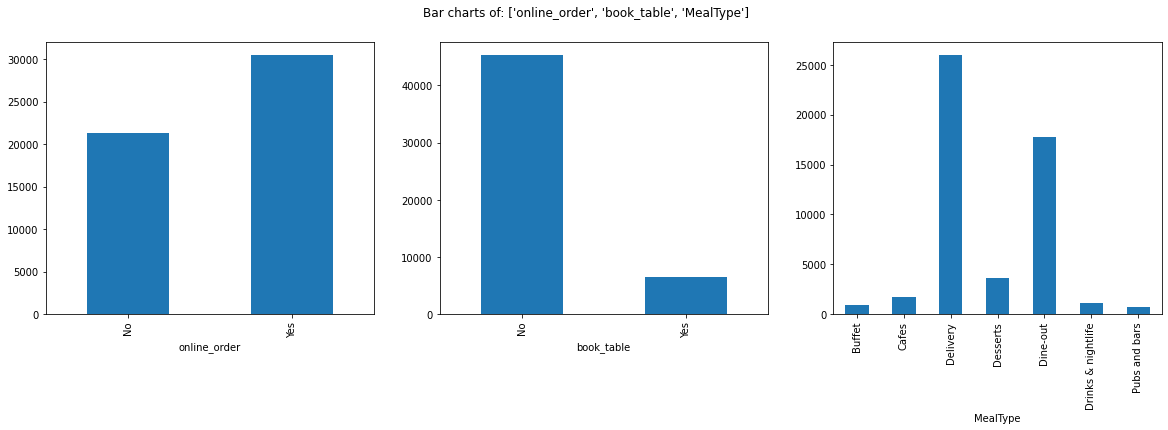

In [32]:
# Calling the function
PlotBarCharts(inpData=data, colsToPlot=[
    'online_order','book_table','MealType'])

### Bar Charts Interpretation

These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

'online_order','book_table','MealType' are not so skeawed so will accept that.

**Selected Categorical Variables:**'online_order','book_table','MealType'

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

Based on the Basic Data Exploration, There are four continuous predictor variables 'votes' and 'costfor2'


array([[<AxesSubplot:title={'center':'votes'}>,
        <AxesSubplot:title={'center':'costfor2'}>]], dtype=object)

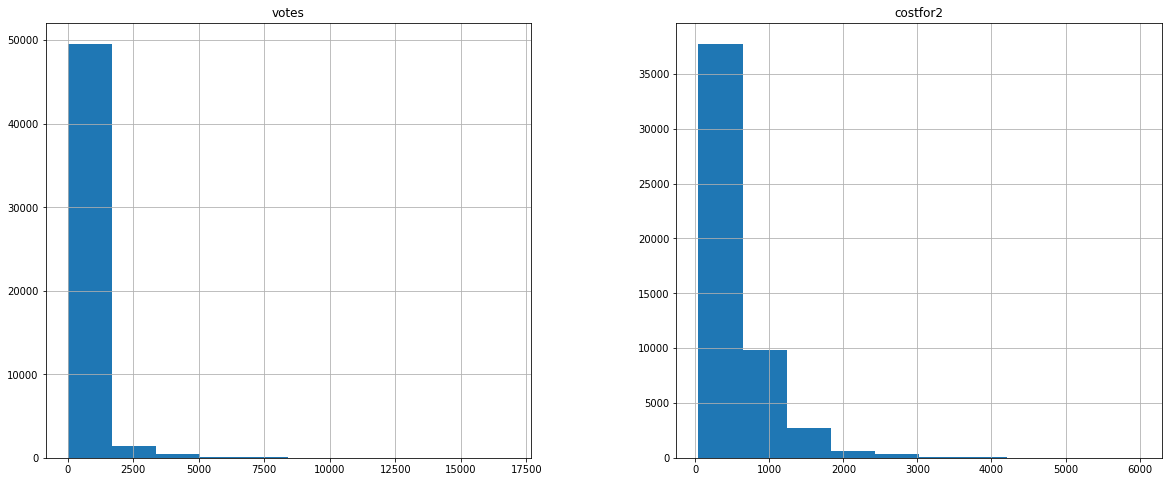

In [33]:
# Plotting histograms of multiple columns together
data.hist([ 'votes','costfor2'], figsize=(20,8))

## Histogram Interpretation

Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "votes", there are around 48068 rows in data that has a vote value between 0 to 1000.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

**Selected Continuous Variables:**

   * **costfor2** :  Selected. Outliers seen beyond 4000, need to treat them.
   * **votes**: Selected. Outliers seen beyond 7500, need to treat them.
  


## Outlier treatment

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

   * Option-1: Delete the outlier Records. Only if there are just few rows lost.
   * Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.


### Replacing outliers for 'votes'

In [34]:
# Finding nearest values to 7500 mark
data['votes'][data['votes']<7500].sort_values(ascending=False)

49270    7330
50080    7330
49628    7330
50060    7330
40505    7284
         ... 
41871       0
41872       0
41873       0
41874       0
25835       0
Name: votes, Length: 51615, dtype: int64

Above result shows the nearest logical value is 7330, hence, replacing any value above 7500 with it.

In [35]:
# Replacing outliers with nearest possibe value
data['votes'][data['votes']>7500] =7330

### Replacing outliers for 'costfor2'

In [36]:
# Finding nearest values to 50000 mark
data['costfor2'][data['costfor2']<4000].sort_values(ascending=False)

40288    3700.0
38627    3500.0
12679    3500.0
39365    3500.0
6143     3500.0
          ...  
27091      40.0
18891      40.0
12232      40.0
29785      40.0
32485      40.0
Name: costfor2, Length: 51333, dtype: float64

Above result shows the nearest logical value is 3700.0, hence, replacing any value above 4000 with it.

In [37]:
# Replacing outliers with nearest possibe value
data['costfor2'][data['costfor2']>4000] =3700.0

### Visualizing distribution after outlier treatment

The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.


<AxesSubplot:xlabel='costfor2', ylabel='Density'>

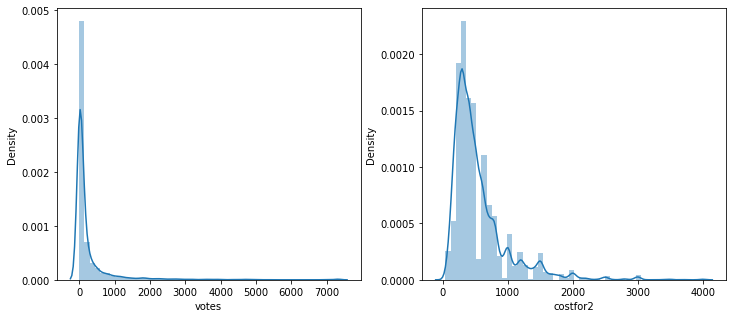

In [38]:
fig, axes = plt.subplots(1, 2,figsize=(12,5))
sns.distplot(data["votes"],ax=axes[0])
sns.distplot(data["costfor2"],ax=axes[1])

## Missing values treatment

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

   * Delete the missing value rows if there are only few records
   * Impute the missing values with MEAN value for continuous variables
   * Impute the missing values with MEDIAN value for continuous variables
   * Impute the missing values with MODE value for categorical variables
   * Interpolate the values based on nearby values
   * Interpolate the values based on business logic



In [39]:
# Finding how many missing values are there for each column
data.isnull().sum()

online_order       0
book_table         0
votes              0
MealType           0
rating          8406
CuisineCount       0
costfor2         346
dtype: int64

In [40]:
# Pecentage of null values
data.isnull().sum() * 100 / len(data)

online_order     0.000000
book_table       0.000000
votes            0.000000
MealType         0.000000
rating          16.253843
CuisineCount     0.000000
costfor2         0.669026
dtype: float64

In [41]:
# Computing missing values with mean value
data["rating"].fillna(value=data["rating"].mean(),inplace=True)
data["costfor2"].fillna(value=data["costfor2"].mean(),inplace=True)

In [42]:
data.isnull().sum()

online_order    0
book_table      0
votes           0
MealType        0
rating          0
CuisineCount    0
costfor2        0
dtype: int64

## Feature Selection

Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables

   * Continuous Vs Continuous ---- Scatter Plot
   * Categorical Vs Continuous---- Box Plot
   * Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables

   * Continuous Vs Continuous ---- Correlation matrix
   * Categorical Vs Continuous---- ANOVA test
   * Categorical Vs Categorical--- Chi-Square test

In this problem the Target variable is Continuous, hence below two scenarios will be present

   * Continuous Target Variable Vs Continuous Predictor
   * Continuous Target Variable Vs Categorical Predictor



## Relationship exploration: Continuous Vs Continuous -- Scatter Charts

When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.


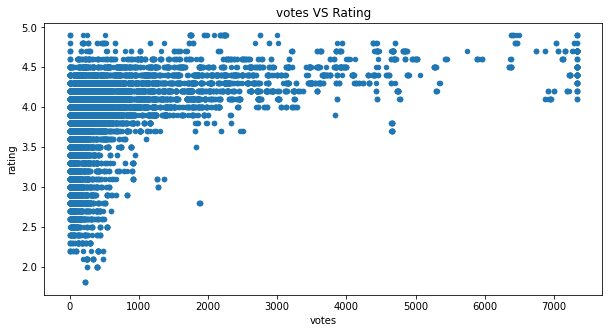

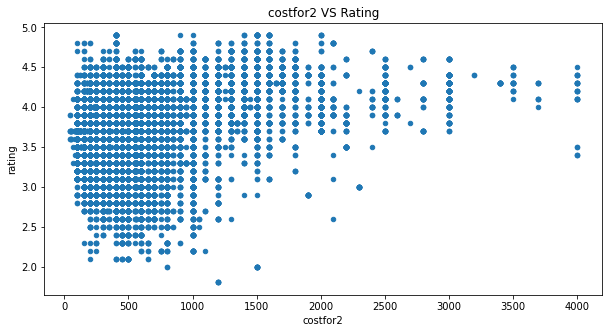

In [43]:
ContinuousCols=['votes', 'costfor2']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    data.plot.scatter(x=predictor, y='rating', figsize=(10,5), title=predictor+" VS "+ 'Rating')



## Scatter charts interpretation

**What should you look for in these scatter charts?**

Trend. You should try to see if there is a visible trend or not. There could be three scenarios

   1. Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

   2. Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

   3. No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value.


## Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as the covariance between two features x
and y

(numerator) divided by the product of their standard deviations (denominator):

image.png


![title](https://www.gstatic.com/education/formulas2/397133473/en/correlation_coefficient_formula.svg)

# 
   * This value can be calculated only between two numeric columns
   * Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
   * Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
   * Correlation near {0} means No relationship, the scatter plot will show no clear trend.
   * If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
   * We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question



In [44]:
# Calculating correlation matrix
ContinuousCols=['rating', 'votes', 'costfor2']

# Creating the correlation matrix
CorrelationData=data[ContinuousCols].corr()
CorrelationData

,rating,votes,costfor2
rating,1.000000,0.446319,0.366171
votes,0.446319,1.000000,0.410057
costfor2,0.366171,0.410057,1.000000


In [45]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['rating'][abs(CorrelationData['rating']) > 0.3]

rating      1.000000
votes       0.446319
costfor2    0.366171
Name: rating, dtype: float64

**Final selected Continuous columns:**

'votes', 'costfor2'

## Relationship exploration: Categorical Vs Continuous -- Box Plots

When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test


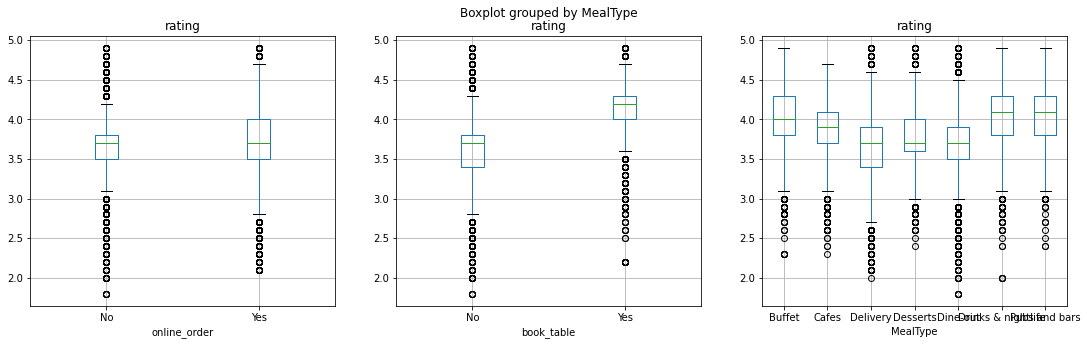

In [46]:
# Box plots for Categorical Target Variable "rating" and continuous predictors
CategoricalColsList=['online_order', 'book_table', 'MealType']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "rating"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    data.boxplot(column='rating', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Box-Plots interpretation

What should you look for in these box plots?

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Rating.

In this data, all three categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below


## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

   * Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
   * ANOVA Test result: Probability of H0 being true



In [47]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [48]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['online_order', 'book_table', 'MealType']
FunctionAnova(inpData=data, 
              TargetVariable='rating', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

online_order is correlated with rating | P-Value: 1.3759962374241101e-43
book_table is correlated with rating | P-Value: 0.0
MealType is correlated with rating | P-Value: 0.0


['online_order', 'book_table', 'MealType']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable. This is something we guessed by looking at the box plots!

**Final selected Categorical columns:**

'online_order', 'book_table', 'MealType'

## Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning


In [49]:
SelectedColumns=['online_order', 'book_table', 'MealType','votes', 'costfor2']

# Selecting final columns
DataForML=data[SelectedColumns]
DataForML.head()

,online_order,book_table,MealType,votes,costfor2
0,Yes,Yes,Buffet,775,800.0
1,Yes,No,Buffet,787,800.0
2,Yes,No,Buffet,918,800.0
3,No,No,Buffet,88,300.0
4,No,No,Buffet,166,600.0


In [50]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

   * Converting each Ordinal Categorical columns to numeric
   * Converting Binary nominal Categorical columns to numeric using 1/0 mapping
   * Converting all other nominal categorical columns to numeric using pd.get_dummies()
   * Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable.


## Converting the binary nominal variable to numeric using 1/0 mapping

In [51]:
# Converting the binary nominal variable to numeric
DataForML['online_order'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['book_table'].replace({'Yes':1, 'No':0}, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [52]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['rating']=data['rating']

# Printing sample rows
DataForML_Numeric.head()

,online_order,book_table,votes,costfor2,MealType_Buffet,MealType_Cafes,MealType_Delivery,MealType_Desserts,MealType_Dine-out,MealType_Drinks & nightlife,MealType_Pubs and bars,rating
0,1,1,775,800.0,1,0,0,0,0,0,0,4.1
1,1,0,787,800.0,1,0,0,0,0,0,0,4.1
2,1,0,918,800.0,1,0,0,0,0,0,0,3.8
3,0,0,88,300.0,1,0,0,0,0,0,0,3.7
4,0,0,166,600.0,1,0,0,0,0,0,0,3.8


## Machine Learning: Splitting the data into Training and Testing sample
    
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.


In [53]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['online_order', 'book_table', 'votes', 'costfor2', 'MealType_Buffet',
       'MealType_Cafes', 'MealType_Delivery', 'MealType_Desserts',
       'MealType_Dine-out', 'MealType_Drinks & nightlife',
       'MealType_Pubs and bars', 'rating'],
      dtype='object')

In [54]:
# Separate Target Variable and Predictor Variables
TargetVariable='rating'
Predictors=['online_order', 'book_table', 'votes', 'costfor2', 'MealType_Buffet',
       'MealType_Cafes', 'MealType_Delivery', 'MealType_Desserts',
       'MealType_Dine-out', 'MealType_Drinks & nightlife',
       'MealType_Pubs and bars']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.


In [55]:
### Sandardization of data ###
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36201, 11)
(36201,)
(15516, 11)
(15516,)


## Multiple Linear Regression

In [57]:
# Multiple Linear Regression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)



# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.27723400331500847

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.9              4.0
1     2.8              4.0
2     3.8              4.0
3     3.5              4.0
4     3.5              4.0
Mean Accuracy on test data: 88.30145630414081
Median Accuracy on test data: 91.81715998501312

Accuracy values for 10-fold Cross Validation:
 [92.34324226 92.30314549 92.65686908 92.37247097 92.72458756 93.03692568
 93.08996773 92.53532096 92.25539681 92.32856614]

Final Average Accuracy of the model: 92.56


## Decision Trees

DecisionTreeRegressor(criterion='mse', max_depth=6)
R2 Value: 0.44772087243321645

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.9              4.0
1     2.8              4.0
2     3.8              3.0
3     3.5              3.0
4     3.5              4.0
Mean Accuracy on test data: 90.02565764071727
Median Accuracy on test data: 91.81715998501312

Accuracy values for 10-fold Cross Validation:
 [93.62527792 93.8297291  94.31447707 93.72278372 94.17652223 94.63620618
 94.59237309 94.35172831 93.80971248 93.99049795]

Final Average Accuracy of the model: 94.1


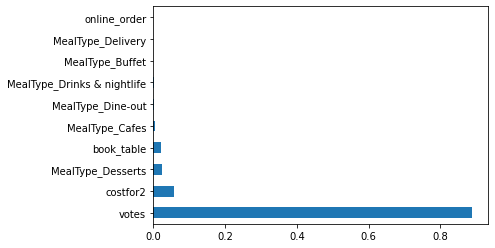

In [58]:
# Decision Trees (Multiple if-else statements!)
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)



# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting a Decision Tree

In [59]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt
# pip install graphviz
# conda install graphviz
# pip install pydotplus

In [60]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'D:\\Anaconda\\Library\\bin\\graphviz'

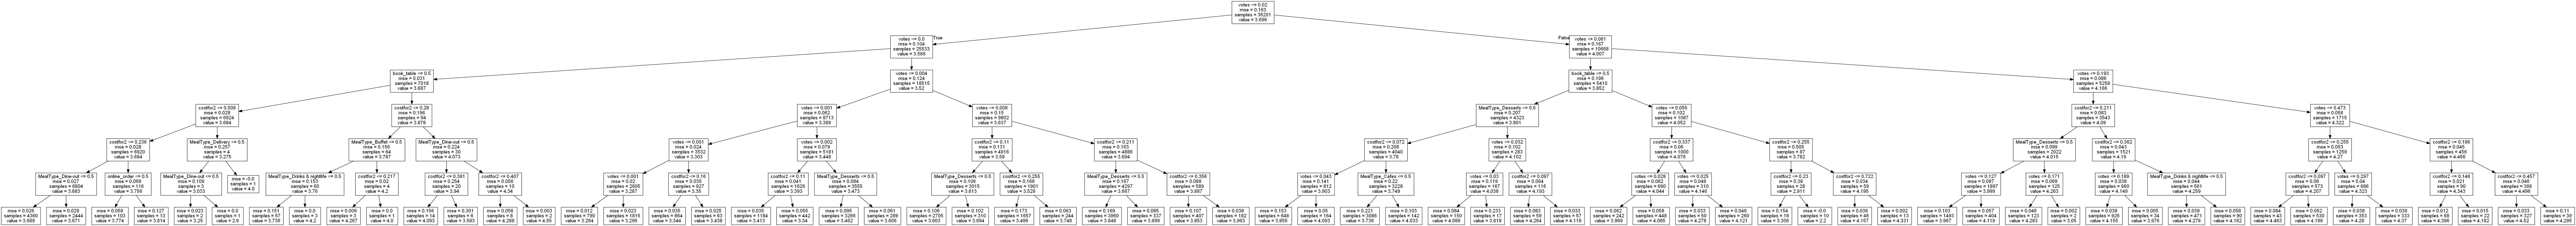

In [61]:
# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=5000,height=5000)
# Double click on the graph to zoom in

## Random Forest

RandomForestRegressor(criterion='mse', max_depth=2, n_estimators=400)
R2 Value: 0.3280698572149072

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.9              4.0
1     2.8              4.0
2     3.8              4.0
3     3.5              4.0
4     3.5              4.0
Mean Accuracy on test data: 88.31904008440235
Median Accuracy on test data: 91.81715998501312

Accuracy values for 10-fold Cross Validation:
 [92.94271632 92.90443318 93.41104548 92.89557858 93.39083557 93.71287491
 93.75426298 93.21727098 92.93460718 92.98851852]

Final Average Accuracy of the model: 93.22


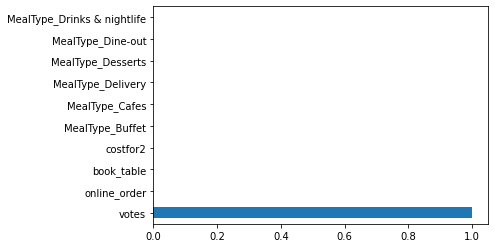

In [62]:
# Random Forest (Bagging of multiple Decision Trees)

RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)



# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting one of the Decision Trees in Random Forest

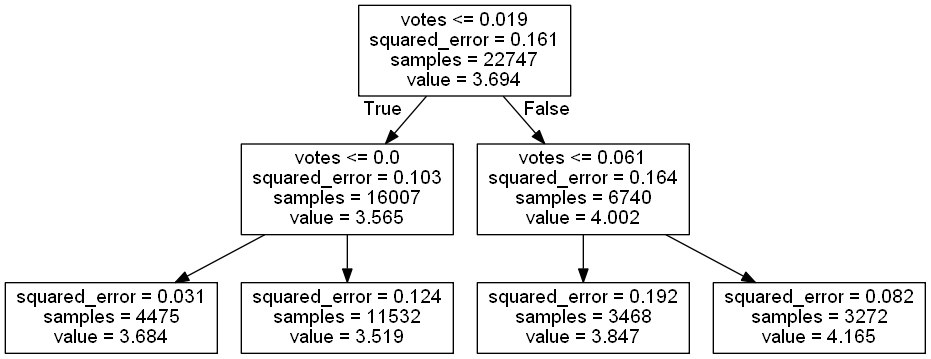

In [63]:
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)
# Double click on the graph to zoom in

## AdaBoost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.19515110094034616

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.9              4.0
1     2.8              3.0
2     3.8              3.0
3     3.5              3.0
4     3.5              3.0
Mean Accuracy on test data: 86.31763208005194
Median Accuracy on test data: 85.71428571428572

Accuracy values for 10-fold Cross Validation:
 [91.69498824 91.62362711 92.08168471 91.61102586 91.90336242 91.9134235
 91.89231093 91.87099579 91.86095637 91.96906518]

Final Average Accuracy of the model: 91.84


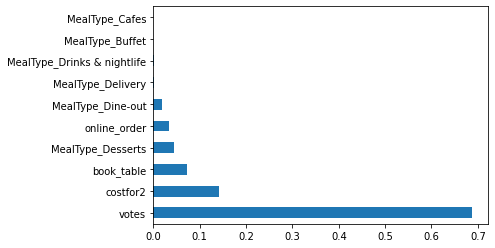

In [64]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting one of the Decision trees from Adaboost

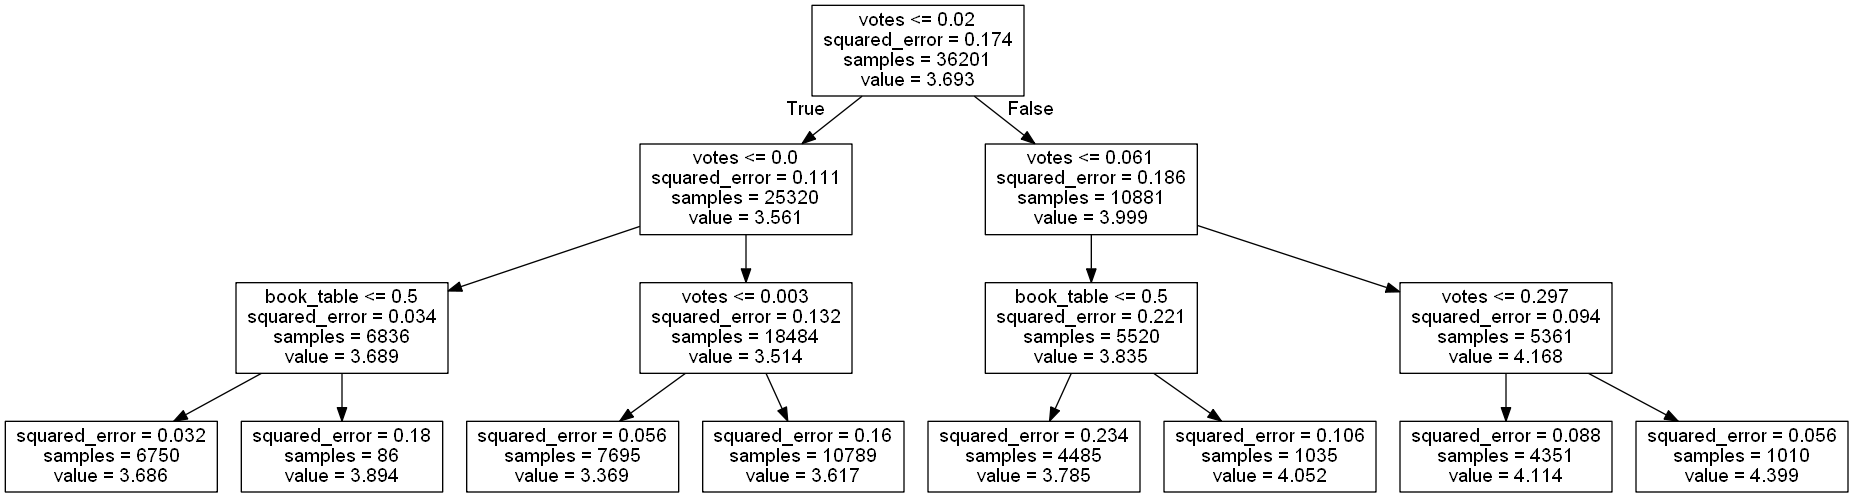

In [65]:
# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=500,height=500)
# Double click on the graph to zoom in

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=None, tree_method=None, validate_parameters=None,
             verbosity=None)
[18:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.4790978940824371

##### Model Validation and Accuracy Calculations ##########
   rating  Predicte

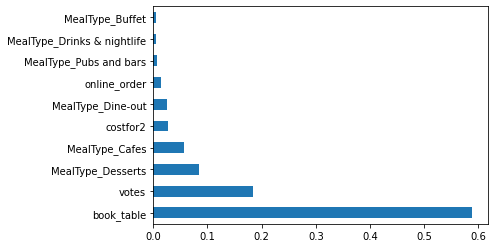

In [66]:
# Xtreme Gradient Boosting (XGBoost)
RegModel=XGBRegressor(max_depth=2, 
                      learning_rate=0.1, 
                      n_estimators=1000, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)


# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Plotting a single Decision tree out of XGBoost

<AxesSubplot:>

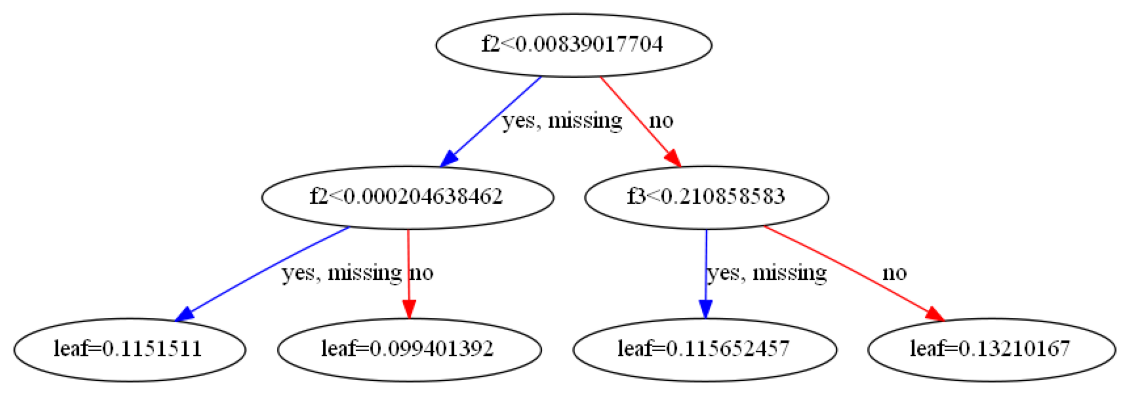

In [67]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

## KNN

In [68]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.700172184564867

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.9              4.0
1     2.8              3.0
2     3.8              4.0
3     3.5              3.0
4     3.5              3.0
Mean Accuracy on test data: 90.39471723253845
Median Accuracy on test data: 91.81715998501312

Accuracy values for 10-fold Cross Validation:
 [93.99339652 95.13485692 95.44254703 94.52706388 94.2082665  96.12733601
 96.26247086 95.63735465 94.34676786 94.51259766]

Final Average Accuracy of the model: 95.02


## SVM

In [69]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=5, kernel='rbf', degree=20, gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['rating']-TestingDataResults['Predictedrating']))/TestingDataResults['rating'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=5, degree=20, gamma=0.01)
R2 Value: 0.2798830515457258

##### Model Validation and Accuracy Calculations ##########
   rating  Predictedrating
0     3.9              4.0
1     2.8              4.0
2     3.8              4.0
3     3.5              4.0
4     3.5              4.0
Mean Accuracy on test data: 88.30209258329494
Median Accuracy on test data: 91.81715998501312

Accuracy values for 10-fold Cross Validation:
 [92.4400142  92.46812354 92.84422053 92.56073467 92.86921447 93.31820093
 93.39296671 92.76444733 92.44418296 92.44980782]

Final Average Accuracy of the model: 92.76


## Deployment of the Model


Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing **KNN** as the final model.

In order to deploy the model we follow below steps

   1. Train the model using 100% data available
   2. Save the model as a serialized file which can be stored anywhere
   3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction


## Choosing only the most important variables

Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'online_order', 'book_table', 'votes', 'costfor2', 'MealType_Buffet',
       'MealType_Cafes', 'MealType_Delivery', 'MealType_Desserts',
       'MealType_Dine-out', 'MealType_Drinks & nightlife',
       'MealType_Pubs and bars'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.



In [70]:
# Separate Target Variable and Predictor Variables
TargetVariable='rating'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['online_order', 'book_table', 'votes', 'costfor2', 'MealType_Buffet',
       'MealType_Cafes', 'MealType_Delivery', 'MealType_Desserts',
       'MealType_Dine-out', 'MealType_Drinks & nightlife',
       'MealType_Pubs and bars']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(51717, 11)
(51717,)


#### Step 1. Retraining the model using 100% data

In [74]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
FinalKNNModel=RegModel.fit(X,y)

KNeighborsRegressor(n_neighbors=3)


In [75]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [93.99339652 95.13485692 95.44254703 94.52706388 94.2082665  96.12733601
 96.26247086 95.63735465 94.34676786 94.51259766]

Final Average Accuracy of the model: 95.02


#### Step 2. Save the model as a serialized file which can be stored anywhere

In [76]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalKNNModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalKNNModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()